In [43]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import f_regression, SelectKBest
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [44]:
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv('city_united.csv')
df

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
0,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,...,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,200.03
1,Raleigh,North Carolina,North America,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,...,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,197.30
2,Zurich,Switzerland,Europe,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,...,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,194.41
3,Wellington,New Zealand,Oceania,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,...,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,193.89
4,Charlotte,North Carolina,North America,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,...,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,193.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Delhi,India,Asia,9.7520,9.869,9.8285,9.099,5.6420,3.71225,3.618000,...,3.712667,0.5120,2.20300,5.5565,3.4145,3.5880,5.6830,3.1160,1.1785,69.56
183,Jakarta,Indonesia,Asia,8.6710,8.471,5.6495,6.437,2.4885,3.64000,4.028667,...,4.184000,1.0275,2.48575,4.6575,6.2660,4.4990,8.1460,2.0665,7.2020,68.46
184,Lagos,Nigeria,Africa,7.7670,9.098,6.4335,2.510,1.7480,3.56475,3.255667,...,2.862333,0.0000,1.90725,5.0610,6.2155,1.6340,1.3585,1.4060,3.8245,50.72
185,Manila,Philippines,Asia,8.5955,8.752,4.8050,3.547,2.6345,3.71300,4.592333,...,4.297667,0.0000,1.68300,5.0065,4.3030,4.6080,7.5840,5.5030,4.8255,41.88


In [46]:
df[df.duplicated()]

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UA_Name                187 non-null    object 
 1   UA_Country             187 non-null    object 
 2   UA_Continent           187 non-null    object 
 3   Housing                187 non-null    float64
 4   Cost of Living         187 non-null    float64
 5   Startups               187 non-null    float64
 6   Venture Capital        187 non-null    float64
 7   Travel Connectivity    187 non-null    float64
 8   Commute                187 non-null    float64
 9   Business Freedom       187 non-null    float64
 10  Safety                 187 non-null    float64
 11  Healthcare             187 non-null    float64
 12  Education              187 non-null    float64
 13  Environmental Quality  187 non-null    float64
 14  Economy                187 non-null    float64
 15  Taxati

10

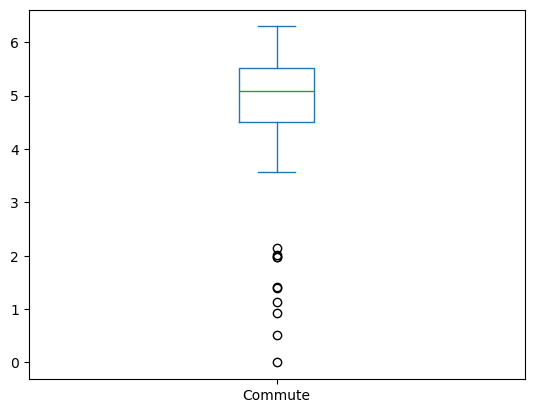

In [48]:
df['Commute'].plot.box()
stat = df.describe()
q3 = stat['Commute']['75%']
q1 = stat['Commute']['25%']
iqr = q3-q1
iqr_min = q1 - 1.5 * iqr
iqr_max = q3 + 1.5 * iqr
df.loc[df['Commute'] < iqr_min].shape[0]

удалять выбросы нет смысла и так маленький объем данных

Изначальная модель регрессии

In [49]:
#df = pd.get_dummies(df, columns=catigorial)
#df

с разбиением катигориальных переменных получается r2=-3 так что уберем их

In [50]:
catigorial = ['UA_Name', 'UA_Country', 'UA_Continent']

In [51]:
X = df.drop(["Quality of Life Index"]+catigorial, axis=1)
y = df[["Quality of Life Index"]]

In [52]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
poly = PolynomialFeatures(2)
train_X = pd.DataFrame(poly.fit_transform(train_X), columns=poly.get_feature_names_out())
test_X = pd.DataFrame(poly.transform(test_X), columns=poly.get_feature_names_out())

In [54]:
f_static, p_values = f_regression(train_X, train_y)
selector = SelectKBest(f_regression, k=5)

In [55]:
train_X = pd.DataFrame(selector.fit_transform(train_X, train_y), columns=selector.get_feature_names_out())
test_X = pd.DataFrame(selector.transform(test_X), columns=selector.get_feature_names_out())

In [56]:
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [57]:
reg = LinearRegression().fit(train_X, train_y)

In [58]:
reg.score(test_X, test_y)

0.8337114091924009

In [59]:
predictions = reg.predict(test_X)

In [60]:
r2_score(test_y, predictions)

0.8337114091924009

In [61]:
import shap
explainer = shap.Explainer(reg, train_X)
shap_values = explainer(test_X)

Лучшее качество модели получилось в связке:полиномиальные переменные второй степени + отбор лучших 5 фаторов по t статистике и стандартизация (хотя она особой роли не играет)</br>
При кодировании категориальных переменных получается странная ситуация, когда на тренировочной выборке получаем хорошее значение (0,98 где-то), но на тестовой с моделью происходит что-то странное